<a href="https://colab.research.google.com/github/saicodes/awesome-collection-of-google-colab-notebooks/blob/master/Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression
========
Linear regression is the simplest of all machine learning models. It tries to approximate the pattern of the given data into a straight line. 

Let us optimize a linear model using the Gradient Descent algorithm.


<img src="https://cdn-images-1.medium.com/max/800/1*KwdVLH5e_P9h8hEzeIPnTg.png"  width = 300px>

Let us import all the neccesary libraries. Matplotlib helps us woth plotting graphs for visualization. Numpy is the common matrix math library used in python.


In [0]:
import matplotlib.pyplot as plt
import numpy as np


Now we generate artificial data. Do not worry about this part.

Let us assume that we are given the dataset:

      x_sample = Distance of Uber Ride
      y_sample = Corresponding Cost
    
    

In [0]:
# Linear Regression

# Generating artificial dataset 
x_sample = np.linspace(1,15,100)
noise1 = np.random.uniform(-0.3,0.3, size=(100))
noise2 = np.random.uniform(-20,20, size=(100))
y_sample = 4*x_sample + 200
y_sample = y_sample + noise2
x_sample = x_sample + noise1




Now that we got the data, lets try to visualize it using matplotlib's plot function.

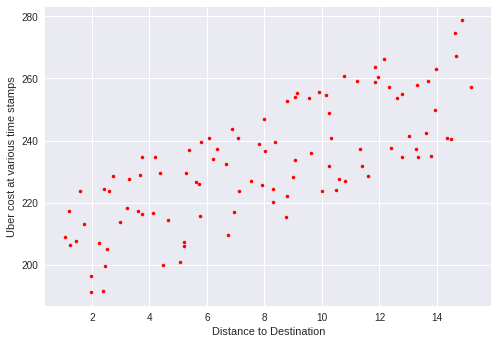

In [0]:
plt.xlabel("Distance to Destination")
plt.ylabel("Uber cost at various time stamps")
plt.plot(x_sample,y_sample, ".r")

We want to approximate this data into a linear function. 

Let us assume :

    y = mx + c
    
as the function. 

Here m is the slope of the line, and c is the y intercept.


In [0]:
def linear_function(m,c,x):
  return m*x+c



Here comes the important part.

IMPORTANT
========

for all those who planned to scroll without paying attention!


We define our algorithm's performance here. We model our loss function as the mean squared error between the predicted values and the dataset

<img src="https://cdn-images-1.medium.com/max/800/1*AQKoBlrYPA6kjvW8XomKUQ.png"  width= 300px>

(read the b as c or whatever!)

In [0]:
def error(m,c,x_sample, y_sample):
  return np.sum((linear_function(m,c,x_sample) - y_sample)**2)/len(x_sample)
  


The Error is a function of both m and c. We would like to get that error minimized. 

How?

Method 1: Take the partial derrivatives with respect to m and c, and equate them to zero. Take 2nd order derrivatives and verify that it is a minima. 
Drawbacks of this method, this is not scalable to large datasets.

Method 2: Take the derrivatives and move in the direction where error decreases maximum. Do this a lot of times, till you become the happiest person in the world and error does not change much.

<img src ="https://cdn-images-1.medium.com/max/800/1*3YJx2rdqMW5ccRJZFH9v6w.png" width=300 >



In [0]:
def derrivative_of_error_m(m,c,x_sample,y_sample):
  derrivative = -2*np.sum((y_sample - linear_function(m,c,x_sample))*x_sample)
  return derrivative/len(x_sample)

def derrivative_of_error_c(m,c,x_sample,y_sample):
  derrivative = -2 * np.sum((y_sample - linear_function(m,c,x_sample)))
  return derrivative/len(x_sample)

We create an optimizer object. If you are not familiar with Classes, you can do the same thing without classes. We basically run a while loop inside till the error becomes lower than the given threshold. We also put a condition to the number of iterations so that the loop breaks if we are not converging.


Notice the parameter Learning Rate. 

Learning rate is crucial for the convergence of the algorithm.
Low learning rate can make it take a long time to converge. A high learning rate can cause the parameters to be optimised to oscilate near the minima or even diverge.

<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" width = 500px>




In [0]:
class GradientDescent():
  def __init__(self,m,c, learning_rate):
    self.m = 0
    self.c = 0
    self.error = 10000
    self.learning_rate = learning_rate
    # logging stuffs, don't worry
    self.error_log = []
    self.m_log = []
    self.c_log = []
    self.dm_log = []
    self.dc_log = []
  def optimize(self, x_sample,y_sample, threshold = 10):
    num_iter = 0
    while(self.error> threshold and num_iter <10000):
      num_iter = num_iter+1
      self.error = error(self.m, self.c, x_sample, y_sample)
      dm = self.learning_rate*(derrivative_of_error_m(self.m, self.c, x_sample, y_sample))
      dc = self.learning_rate*(derrivative_of_error_c(self.m, self.c, x_sample, y_sample))
      self.m = self.m - dm
      self.c = self.c - dc
      
      #logging
      self.m_log.append(self.m)
      self.c_log.append(self.c)
      self.dm_log.append(dm)
      self.dc_log.append(dc)
      self.error_log.append(self.error)
      
      print("Current Loss:\t %f" %self.error)
      print("Current Value:\n\tm:\t%f\n\tc:\t%f" %(self.m,self.c))
      print("_"*100)

We now initialise the variables and define the "hyperparameters" and run the algorithm.

Hyperparameters are those important variables like learning rate, number of neurons in a neural network etc.



In [0]:
initial_m = 0
initial_c = 0
learning_rate = 0.01
alg = GradientDescent(initial_m,initial_c,learning_rate)
alg.optimize(x_sample,y_sample,200)


Current Loss:	 54633.500681
Current Value:
	m:	38.475508
	c:	4.659186
____________________________________________________________________________________________________
Current Loss:	 26816.385798
Current Value:
	m:	14.088419
	c:	3.065606
____________________________________________________________________________________________________
Current Loss:	 15722.161880
Current Value:
	m:	29.328132
	c:	5.408051
____________________________________________________________________________________________________
Current Loss:	 11273.238186
Current Value:
	m:	19.589118
	c:	5.263906
____________________________________________________________________________________________________
Current Loss:	 9465.205282
Current Value:
	m:	25.596311
	c:	6.681773
____________________________________________________________________________________________________
Current Loss:	 8706.878172
Current Value:
	m:	21.678216
	c:	7.109585
_____________________________________________________________________________

Congratulations!


You have now trained your first machine learning model from scratch! Without any machine learning libraries! 

Disclaimer: For those who have not done this before only.

Now that we have got the m and c values of our line, let us plot it!

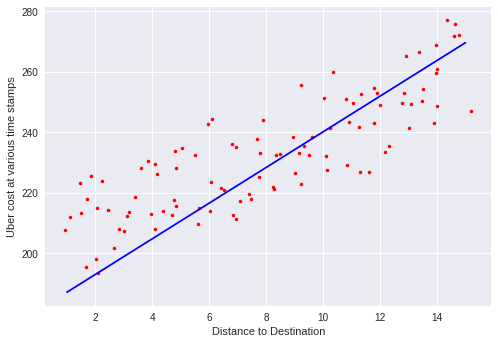

In [0]:
plt.xlabel("Distance to Destination")
plt.ylabel("Uber cost at various time stamps")
plt.plot(x_sample,y_sample, ".r")


x = np.linspace(1,15,100)
y = linear_function(alg.m,alg.c,x)
plt.plot(x,y,"-b")

Try plotting other logs and try to understand their behaviour.

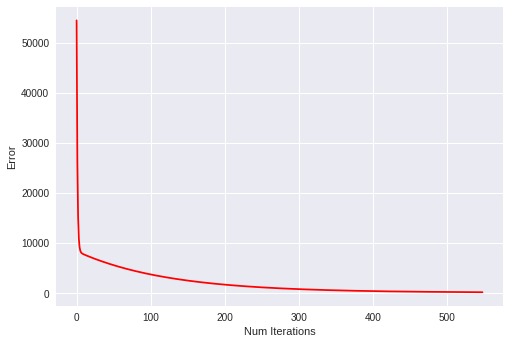

In [0]:
plt.xlabel("Num Iterations")
plt.ylabel("Error")
plt.plot(alg.error_log, 'r-')

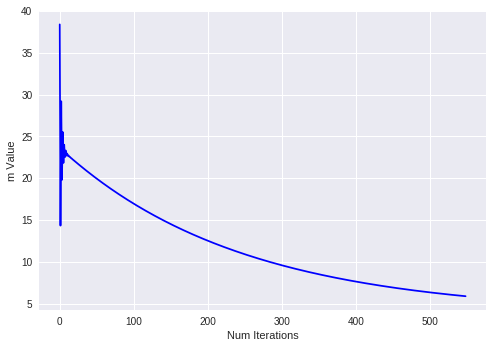

In [0]:
plt.xlabel("Num Iterations")
plt.ylabel("m Value")
plt.plot(alg.m_log, 'b-')

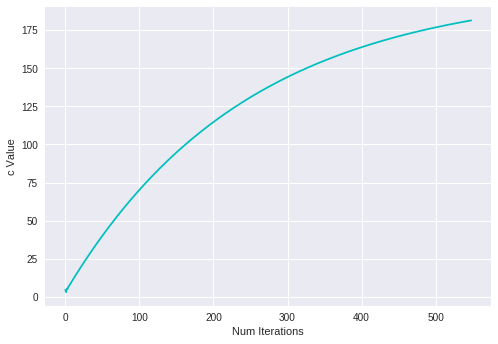

In [0]:
plt.xlabel("Num Iterations")
plt.ylabel("c Value")
plt.plot(alg.c_log, 'c-')

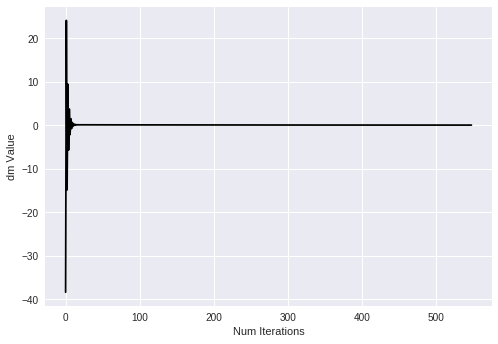

In [0]:
plt.xlabel("Num Iterations")
plt.ylabel("dm Value")
plt.plot(alg.dm_log, 'k-')

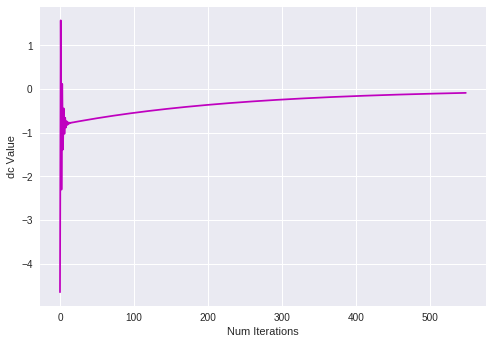

In [0]:
plt.xlabel("Num Iterations")
plt.ylabel("dc Value")
plt.plot(alg.dc_log, 'm-')